Connect with Google Drive to access data

In [1]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Colab Notebooks/

Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks


**Importing Python Packages**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve

Read original file and convert to pickle so that it is easier and faster to read whenever it is required

In [3]:
df_original = pd.read_json('./DS/transactions.txt', lines=True)
df_original.replace('', np.nan, inplace=True)
pd.to_pickle(df_original, './DS/pickles/original_data')

Read pickle file containing original data

In [4]:
df_original = pd.read_pickle('./DS/pickles/original_data')

**Dataset Summary**

In [5]:
print("Dataset Details: \n")
print("# of Rows: {}".format(df_original.shape[0]))
print("# of Columns: {}".format(df_original.shape[1]))

Dataset Details: 

# of Rows: 786363
# of Columns: 29


In [6]:
print(df_original.isnull().sum())

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

All records in 'echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd' are empty and can remove from dataset

**Cleaning dataset**

In [7]:
df_cleaned = df_original.drop(['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd'], axis=1)

In [8]:
pd.to_pickle(df_cleaned, './DS/pickles/final_data')

In [9]:
print(df_cleaned.isnull().sum())

accountNumber                  0
customerId                     0
creditLimit                    0
availableMoney                 0
transactionDateTime            0
transactionAmount              0
merchantName                   0
acqCountry                  4562
merchantCountryCode          724
posEntryMode                4054
posConditionCode             409
merchantCategoryCode           0
currentExpDate                 0
accountOpenDate                0
dateOfLastAddressChange        0
cardCVV                        0
enteredCVV                     0
cardLast4Digits                0
transactionType              698
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
isFraud                        0
dtype: int64


In [68]:
df_cleaned[['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']].describe()

,creditLimit,availableMoney,transactionAmount,currentBalance
count,786363.000000,786363.000000,786363.000000,786363.000000
mean,10759.464459,6250.725369,136.985791,4508.739089
std,11636.174890,8880.783989,147.725569,6457.442068
min,250.000000,-1005.630000,0.000000,0.000000
25%,5000.000000,1077.420000,33.650000,689.910000
50%,7500.000000,3184.860000,87.900000,2451.760000
75%,15000.000000,7500.000000,191.480000,5291.095000
max,50000.000000,50000.000000,2011.540000,47498.810000


In [10]:
df_cleaned['acqCountry'].value_counts()

US     774709
MEX      3130
CAN      2424
PR       1538
Name: acqCountry, dtype: int64



*   99% of acqCountry is US



In [11]:
df_cleaned['merchantCountryCode'].value_counts()

US     778511
MEX      3143
CAN      2426
PR       1559
Name: merchantCountryCode, dtype: int64



*   99% of merchantCountryCode is from US



**Setting up graph style**

In [12]:
sns.set_style('darkgrid')

**Correlation matrix**

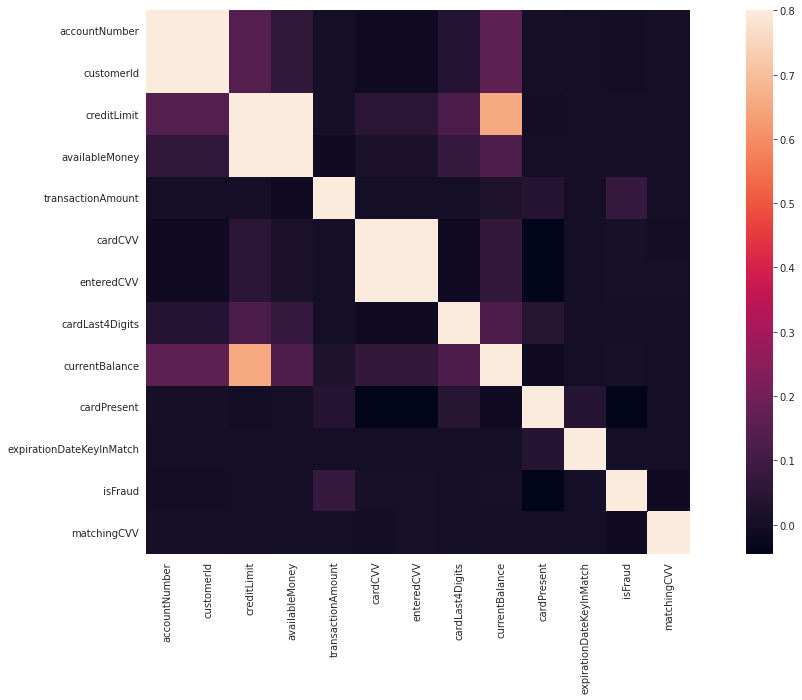

In [70]:
corrmat = df_cleaned.corr()
fig = plt.figure(figsize = (20,10))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

*   There is correlation between creditLimit, transactionAmount, availableMoney, currentBalance
*   There is some correlation between transactionAmount and isFraud

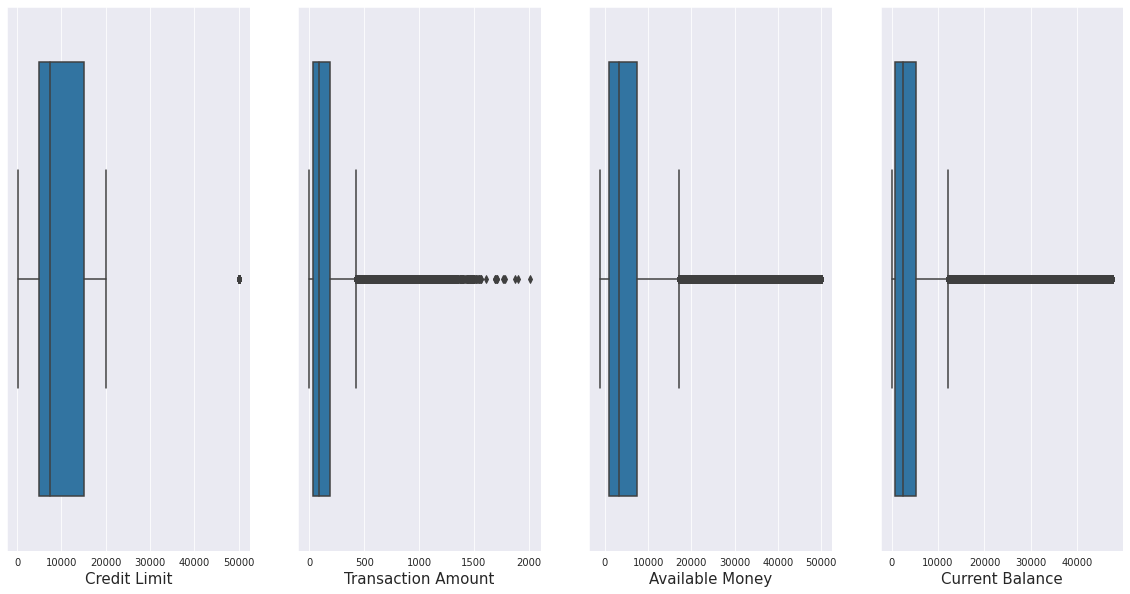

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,10))

original_col_name = ['creditLimit', 'transactionAmount', 'availableMoney', 'currentBalance']
updated_col_name = ['Credit Limit', 'Transaction Amount', 'Available Money', 'Current Balance']

for i in range(0, len(original_col_name)):
    sns.boxplot(data=df_cleaned, x=original_col_name[i], ax=ax[i])
    ax[i].set_xlabel(updated_col_name[i], fontsize=15)

**1.Credit Limit**

There is one extreme outlier which lies in the range of 50000. Also data is not normaly distributed.

**2.Transaction Amount**

The plot appears right skewed. The maximum transaction amount is 2000. There are more outliers. Also the transaction amount is low (most of the people are spending money wisely)

**3.Available Money**

There are more outliers as the money increases. The plot appears right skewed. Also the avaliable money is low.


**4.Current Balance**

The plot appears right skewed. The current balance is too low.

**Histogram Plot**

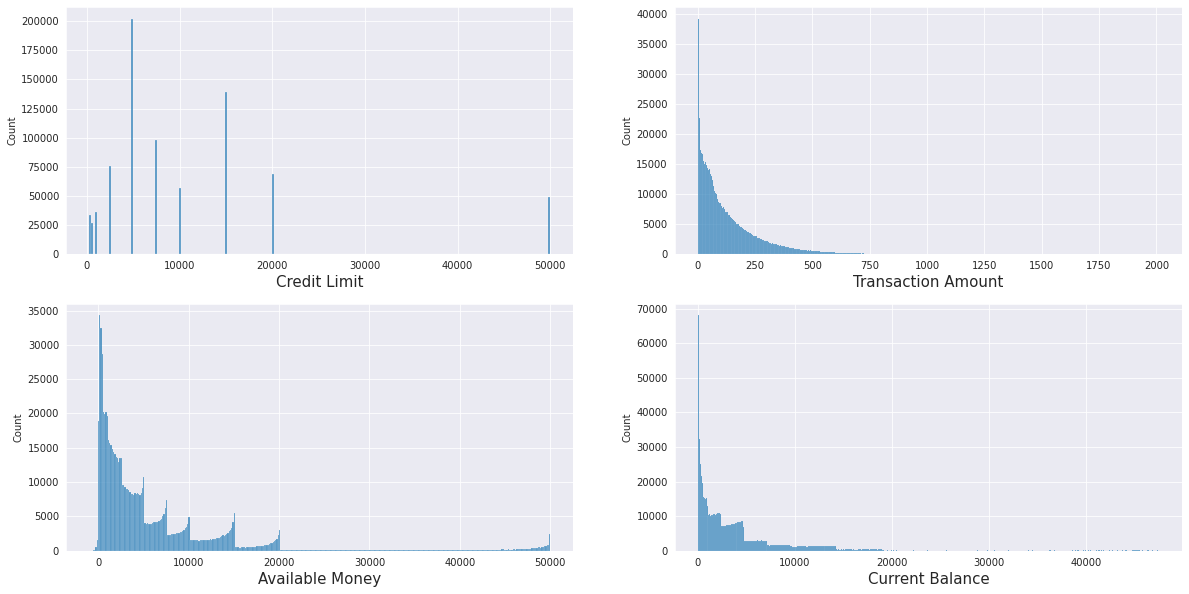

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

original_col_name = ['creditLimit', 'transactionAmount', 'availableMoney', 'currentBalance']
updated_col_name = ['Credit Limit', 'Transaction Amount', 'Available Money', 'Current Balance']

cnt = 0

for i in range(2):
  for j in range(2):
    sns.histplot(df_cleaned[original_col_name[cnt]], ax=ax[i][j])
    ax[i][j].set_xlabel(updated_col_name[cnt], fontsize=15)
    cnt+=1

**Credit Limit**

Data is randomly distributed. Most the people have credit limit between 0 to 20000. And also none of the people have credit limit between 20000 to 40000, and very few people is having credit limit 50000

**Transaction Amount**

We can see that most of the people are using credit card for there small purchases. The plot is right skewed.

**Available Money**

The plot shows right skewed.

**Current Balance**

The customer balance is too low and also they tend to spend more as we can see from the transaction amount and there credit limit. Also the plot is right skewed.

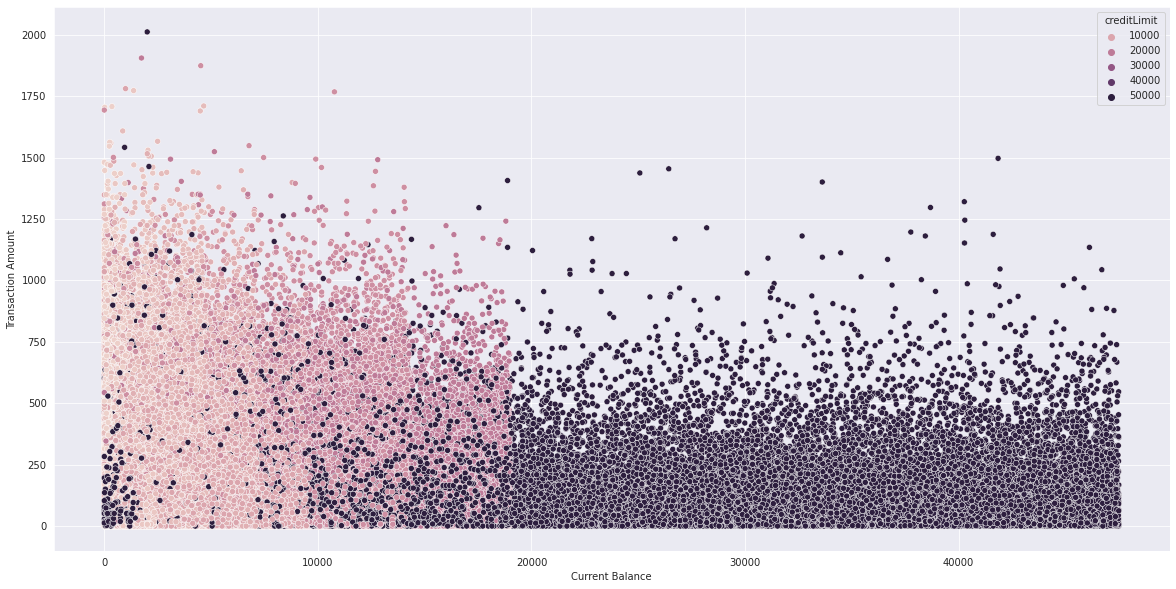

In [71]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_cleaned, x='currentBalance', y='transactionAmount', hue='creditLimit')
plt.xlabel('Current Balance')
plt.ylabel('Transaction Amount')
plt.show()

People with higher credit limit are wisiely using money. On the otherhand, people with low credit limit are making more transaction, but it does not goes with all case.

**Fraud vs Non Fraud**

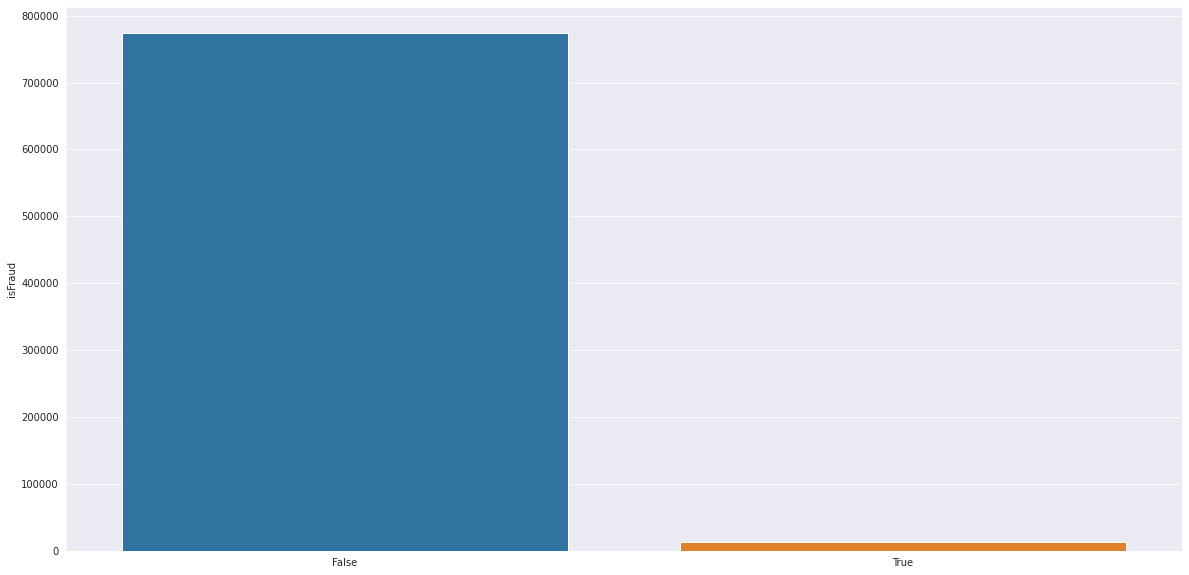

In [74]:
fraud_vals = df_cleaned['isFraud'].value_counts()

plt.figure(figsize=(20,10))
sns.barplot(x=fraud_vals.index, y=fraud_vals)
plt.show()

There are minimal amount of fraudulent transactions



**Matching CVV**

In [78]:
df_cleaned['CVVMatching'] = df_cleaned['cardCVV'] == df_cleaned['enteredCVV']

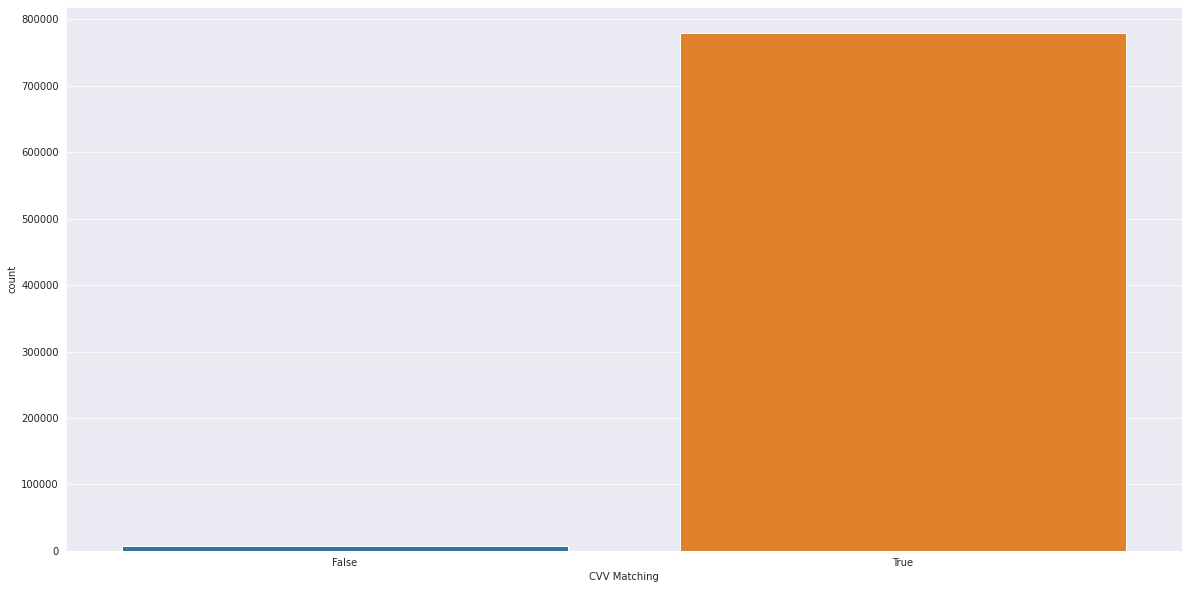

In [79]:
plt.figure(figsize=(20,10))
ax = sns.countplot(data=df_cleaned, x='CVVMatching')
plt.xlabel('CVV Matching')
plt.show()

There are some transaction happned without cvv matching

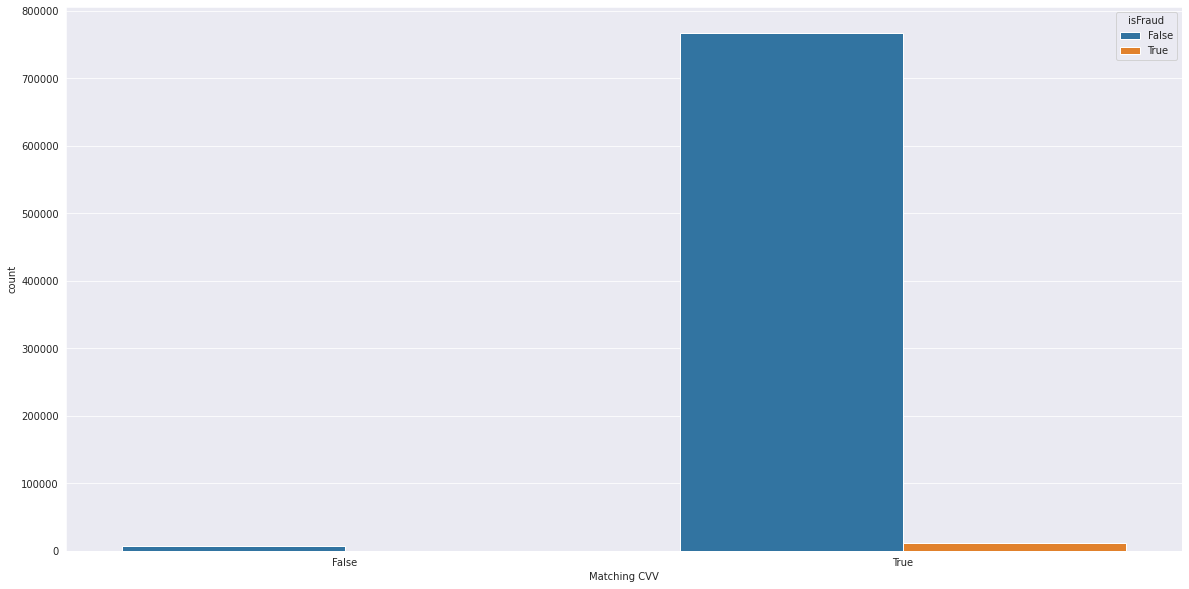

In [76]:


plt.figure(figsize=(20,10))
ax = sns.countplot(data=df_cleaned, x='matchingCVV', hue='isFraud')
plt.xlabel('Matching CVV')
plt.show()

All fraud transactions are occurring when cvv is matching.

**Reversal Transaction or Multi-swipe Transaction**

In [48]:
df = pd.read_pickle('./DS/pickles/final_data')
df[["transactionDateTime"]] = df[["transactionDateTime"]].apply(pd.to_datetime)
df.sort_values(by='transactionDateTime',ascending=True,inplace=True)
df = df.reset_index(drop=True)

In [80]:
df['transactionType'].value_counts()

PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
Name: transactionType, dtype: int64

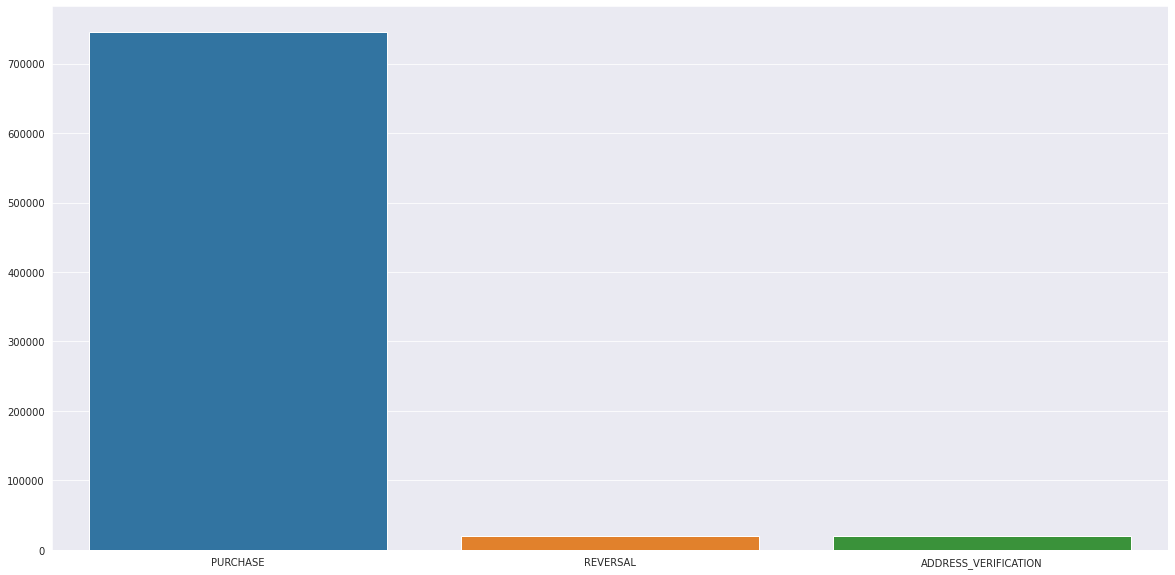

In [81]:
df_transactionType = df['transactionType'].value_counts()
plt.figure(figsize=(20,10))
sns.barplot(x=df_transactionType.index, y=df_transactionType.values)
plt.show()

Sum of reversal transaction amount

In [82]:
round(df.loc[df['transactionType'] == 'REVERSAL', 'transactionAmount'].sum(),2)

2821792.5

Number of reversal transaction

In [51]:
df.loc[df['transactionType'] == 'REVERSAL', 'transactionAmount'].count()

20303

Checking duplicate transctions or multi-swipe

In [52]:
multi_swipe=(df.groupby('customerId')['transactionDateTime'].diff().dt.total_seconds().lt(180))
df['Duplicated']=np.where((df.transactionAmount.duplicated()&multi_swipe),'True','False')

In [85]:
df['Duplicated'].value_counts()

False    761665
True      24698
Name: Duplicated, dtype: int64

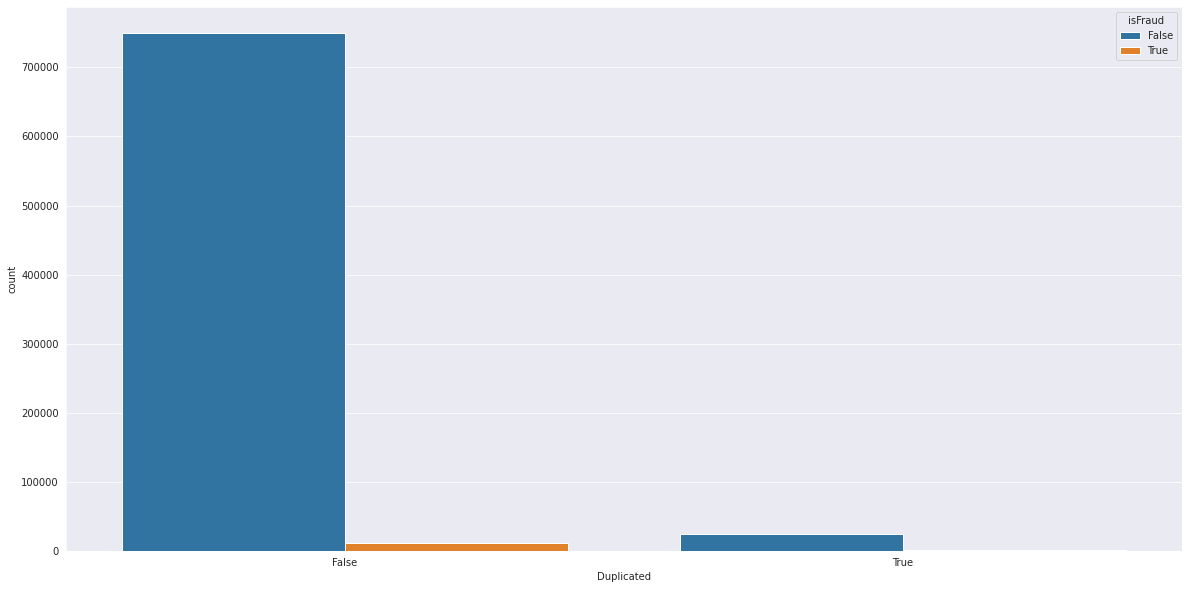

In [84]:
plt.figure(figsize=(20,10))
ax = sns.countplot(data=df, x='Duplicated', hue='isFraud')
plt.xlabel('Duplicated')
plt.show()

Sum of transaction amount for duplicate transaction

In [86]:
round(df.loc[df['Duplicated'] == 'True', 'transactionAmount'].sum(),2)

3286519.63

Number of transaction for duplicate transaction

In [56]:
df.loc[df['Duplicated'] == 'True', 'transactionAmount'].count()

24698

**Models**

In [91]:
df = pd.read_pickle('./DS/pickles/final_data')

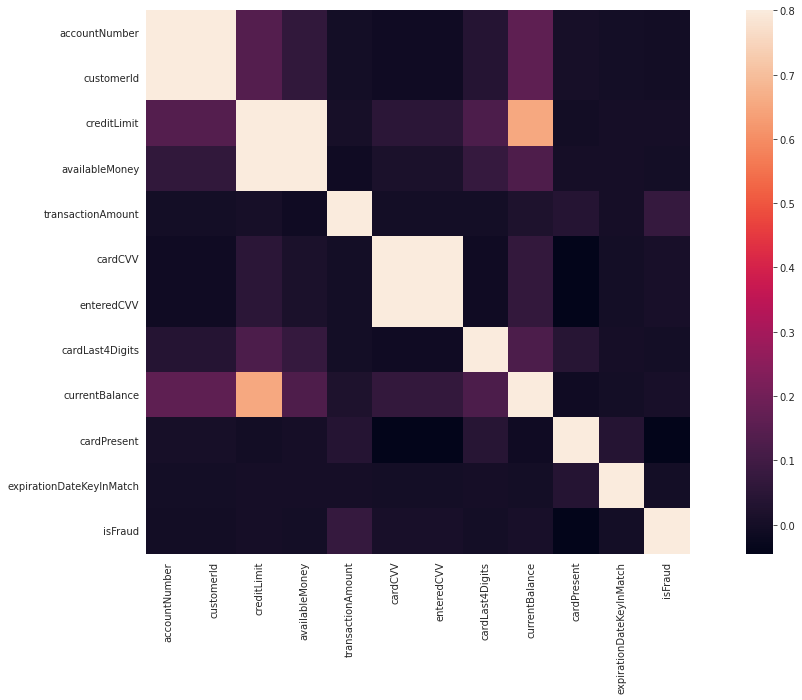

In [92]:
corrmat = df.corr()
fig = plt.figure(figsize = (20,10))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

*   There is correlation between creditLimit, transactionAmount, availableMoney, currentBalance
*   There is some correlation between transactionAmount and isFraud
*   We can drop other columns




In [93]:
for col in ['isFraud']:
    df[col] = df[col].replace({False: 0, True: 1})

df.drop(['cardLast4Digits',
         'merchantName',
         'accountOpenDate',
         'transactionDateTime',
         'currentExpDate',
         'customerId',
         'dateOfLastAddressChange',
         'accountNumber',
         'enteredCVV',
         'cardCVV',
         'acqCountry',
         'merchantCountryCode',
         'merchantCategoryCode',
         'transactionType',
         'posEntryMode',
         'posConditionCode','cardPresent',
         'expirationDateKeyInMatch',
         ], inplace=True, axis=1)

In [94]:
df.isnull().sum()

creditLimit          0
availableMoney       0
transactionAmount    0
currentBalance       0
isFraud              0
dtype: int64

Doing Under Sampling because there is big mismatch between number of fraud transaction and non fraud transaction

In [95]:
ros = RandomUnderSampler(sampling_strategy='majority')
y = df['isFraud']
df.drop('isFraud', inplace=True, axis=1)
new_x, new_y = ros.fit_resample(df, y)
print(f'Before Random Under Sampling: {df.shape}')
print(f'After Random Under Sampling: {new_x.shape}')

Before Random Under Sampling: (786363, 4)
After Random Under Sampling: (24834, 4)


In [96]:
y.value_counts()

0    773946
1     12417
Name: isFraud, dtype: int64

In [97]:
x_train, x_test, y_train, y_test = train_test_split(new_x, new_y)

data = {'x_train': x_train, 'x_test': x_test, 'y_train': y_train, 'y_test': y_test}
pd.to_pickle(data, './DS/pickles/train_test_data')

In [98]:
y_true = data['y_test'].tolist()

In [26]:
data = pd.read_pickle('./DS/pickles/train_test_data')

**SVM**

In [99]:
params = {
            'C': [0.5, 1, 5],
            'kernel': ['poly', 'rbf']
        }

In [100]:
grid_svm = GridSearchCV(estimator=SVC(probability=True), param_grid=params, cv=2, verbose=3)

grid_svm.fit(data['x_train'], data['y_train'])

pd.to_pickle(grid_svm, './DS/pickles/svc')

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 1/2] END ................C=0.5, kernel=poly;, score=0.510 total time=  16.9s
[CV 2/2] END ................C=0.5, kernel=poly;, score=0.512 total time=  18.1s
[CV 1/2] END .................C=0.5, kernel=rbf;, score=0.522 total time=  20.6s
[CV 2/2] END .................C=0.5, kernel=rbf;, score=0.523 total time=  21.4s
[CV 1/2] END ..................C=1, kernel=poly;, score=0.511 total time=  19.4s
[CV 2/2] END ..................C=1, kernel=poly;, score=0.512 total time=  22.9s
[CV 1/2] END ...................C=1, kernel=rbf;, score=0.536 total time=  27.3s
[CV 2/2] END ...................C=1, kernel=rbf;, score=0.542 total time=  25.2s
[CV 1/2] END ..................C=5, kernel=poly;, score=0.511 total time=  28.0s
[CV 2/2] END ..................C=5, kernel=poly;, score=0.514 total time=  22.9s
[CV 1/2] END ...................C=5, kernel=rbf;, score=0.583 total time=  27.1s
[CV 2/2] END ...................C=5, kernel=rbf;,

In [101]:
svm = grid_svm.best_estimator_
print(f'Best CV score: {grid_svm.best_score_}')
for key, value in grid_svm.best_params_.items():
    print(f'{key}: {value}')

y_pred = svm.predict(data['x_test'])
y_pred_prob = svm.predict_proba(data['x_test'])[:,1]
svc = [y_true, y_pred_prob]


Best CV score: 0.5846980632143001
C: 5
kernel: rbf


In [102]:
conf_svm = confusion_matrix(y_true, y_pred)
acc_svm = accuracy_score(y_true, y_pred)

print(f'Accuracy: {acc_svm}')
print(f'Confusion Matrix: \n {conf_svm}')

Accuracy: 0.5946207118698663
Confusion Matrix: 
 [[2430  634]
 [1883 1262]]


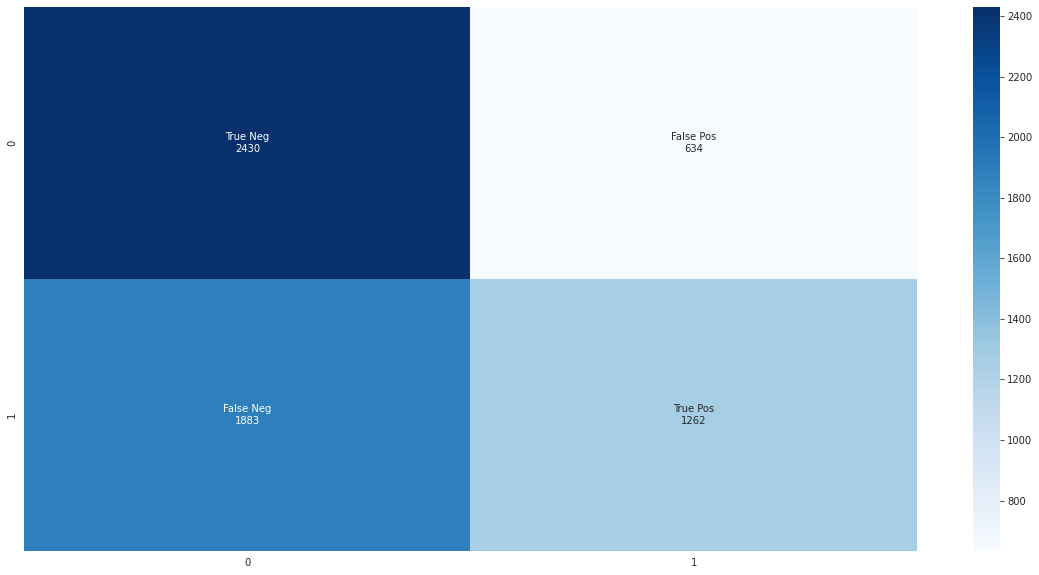

In [103]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_svm.flatten()]
labels = [f"{g_name}\n{g_count}" for g_name, g_count in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(20,10))
sns.heatmap(conf_svm, annot=labels, fmt='', cmap='Blues')
plt.show()

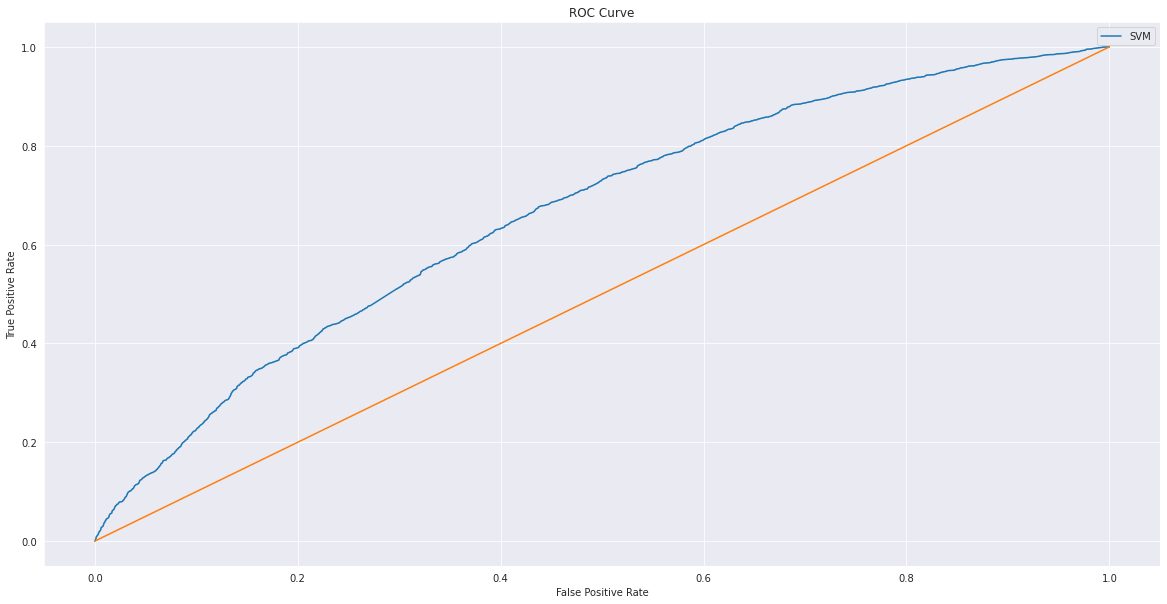

In [104]:
fpr, tpr, _ = roc_curve(svc[0], svc[1])

plt.figure(figsize=(20,10))
sns.lineplot(x=fpr, y=tpr, label="SVM")
ax = sns.lineplot(x=[0, 0.5, 1], y=[0, 0.5, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve')
plt.show()

**RandomForest**

In [105]:
params = {
            'n_estimators': [10, 50, 100],
            'max_depth': [1, 3],
            'max_features': ['auto', 'sqrt'],
            'min_samples_split': [2, 5],
        }

In [106]:
grid_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, cv=5, verbose=3)

grid_rf.fit(data['x_train'], data['y_train'])

pd.to_pickle(grid_rf, './DS/pickles/rf')


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END max_depth=1, max_features=auto, min_samples_split=2, n_estimators=10;, score=0.625 total time=   0.1s
[CV 2/5] END max_depth=1, max_features=auto, min_samples_split=2, n_estimators=10;, score=0.628 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=auto, min_samples_split=2, n_estimators=10;, score=0.626 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=auto, min_samples_split=2, n_estimators=10;, score=0.628 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=auto, min_samples_split=2, n_estimators=10;, score=0.623 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=auto, min_samples_split=2, n_estimators=50;, score=0.626 total time=   0.2s
[CV 2/5] END max_depth=1, max_features=auto, min_samples_split=2, n_estimators=50;, score=0.627 total time=   0.2s
[CV 3/5] END max_depth=1, max_features=auto, min_samples_split=2, n_estimators=50;, score=0.630 total time=   0.2s
[CV 4/5] END max_d

In [107]:
rf = grid_rf.best_estimator_
print(f'CV score: {grid_rf.best_score_}')
for key, value in grid_rf.best_params_.items():
    print(f'{key}: {value}')

y_pred = rf.predict(data['x_test'])
y_pred_prob = rf.predict_proba(data['x_test'])[:,1]
rand_f = [y_true, y_pred_prob]

CV score: 0.6275973154362415
max_depth: 3
max_features: auto
min_samples_split: 2
n_estimators: 10


In [108]:
conf_rf = confusion_matrix(y_true, y_pred)
acc_rf = accuracy_score(y_true, y_pred)

print(f'Accuracy: {acc_rf}')
print(f'Confusion Matrix: \n {conf_rf}')

Accuracy: 0.622161378643904
Confusion Matrix: 
 [[1706 1358]
 [ 988 2157]]


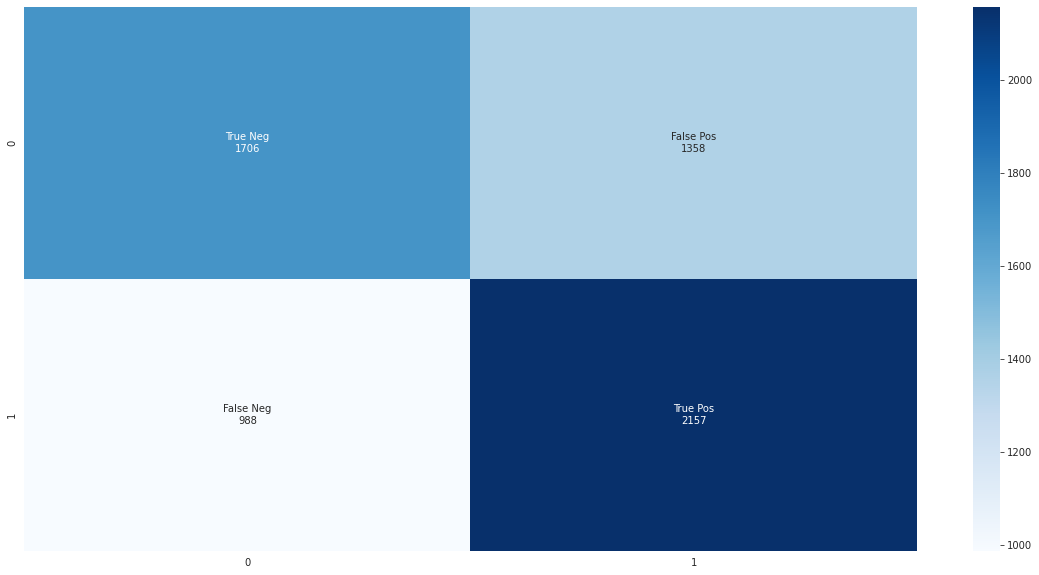

In [109]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_rf.flatten()]
labels = [f"{g_name}\n{g_count}" for g_name, g_count in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(20,10))
sns.heatmap(conf_rf, annot=labels, fmt='', cmap='Blues')
plt.show()

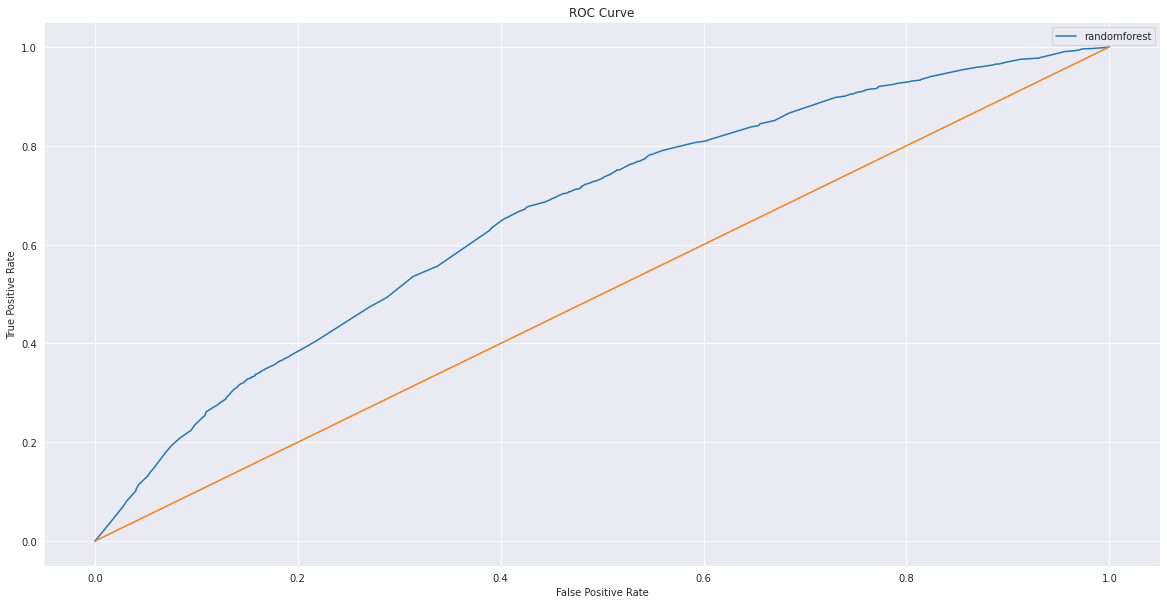

In [110]:
fpr, tpr, _ = roc_curve(rand_f[0], rand_f[1])

plt.figure(figsize=(20,10))
sns.lineplot(x=fpr, y=tpr, label="randomforest")
ax = sns.lineplot(x=[0, 0.5, 1], y=[0, 0.5, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve')
plt.show()

**DecisionTree**

In [112]:
params = {
            'max_depth': [3, 5, 7],
            'min_samples_leaf': [1, 3, 5, 7],
            'max_leaf_nodes': [None, 3, 5, 7]
        }    

In [113]:
grid_dtc = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, cv=5, verbose=3)

grid_dtc.fit(data['x_train'], data['y_train'])

pd.to_pickle(grid_dtc, './DS/pickles/dec_tree')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=1;, score=0.626 total time=   0.0s
[CV 2/5] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=1;, score=0.627 total time=   0.0s
[CV 3/5] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=1;, score=0.628 total time=   0.0s
[CV 4/5] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=1;, score=0.626 total time=   0.0s
[CV 5/5] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=1;, score=0.628 total time=   0.0s
[CV 1/5] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3;, score=0.626 total time=   0.0s
[CV 2/5] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3;, score=0.627 total time=   0.0s
[CV 3/5] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3;, score=0.628 total time=   0.0s
[CV 4/5] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3;, score=0.626 total time=   0.0s
[CV 5/5] END max_depth=3, max_leaf_nodes=None, 

In [114]:
dec_tree = grid_dtc.best_estimator_
print(f'CV score: {grid_dtc.best_score_}')
for key, value in grid_dtc.best_params_.items():
    print(f'{key}: {value}')

y_pred = dec_tree.predict(data['x_test'])
y_pred_prob = dec_tree.predict_proba(data['x_test'])[:,1]
dec = [y_true, y_pred_prob]

CV score: 0.6269530201342282
max_depth: 3
max_leaf_nodes: None
min_samples_leaf: 1


In [115]:
conf_dt = confusion_matrix(y_true, y_pred)
acc_dt = accuracy_score(y_true, y_pred)

print(f'Accuracy: {acc_dt}')
print(f'Confusion Matrix: \n {conf_dt}')

Accuracy: 0.6237719439523273
Confusion Matrix: 
 [[1743 1321]
 [1015 2130]]


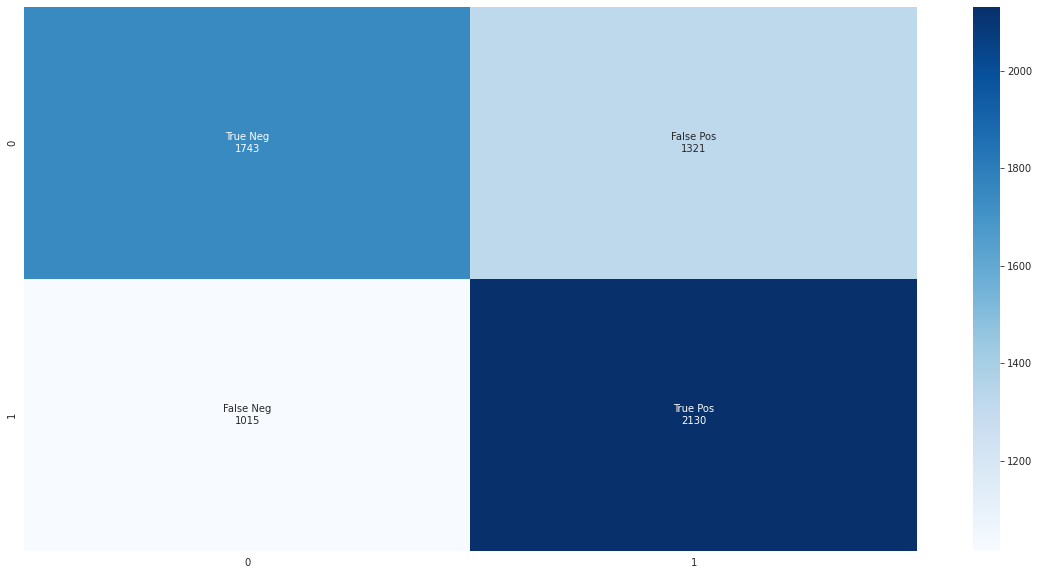

In [116]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_dt.flatten()]
labels = [f"{g_name}\n{g_count}" for g_name, g_count in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(20,10))
sns.heatmap(conf_dt, annot=labels, fmt='', cmap='Blues')
plt.show()

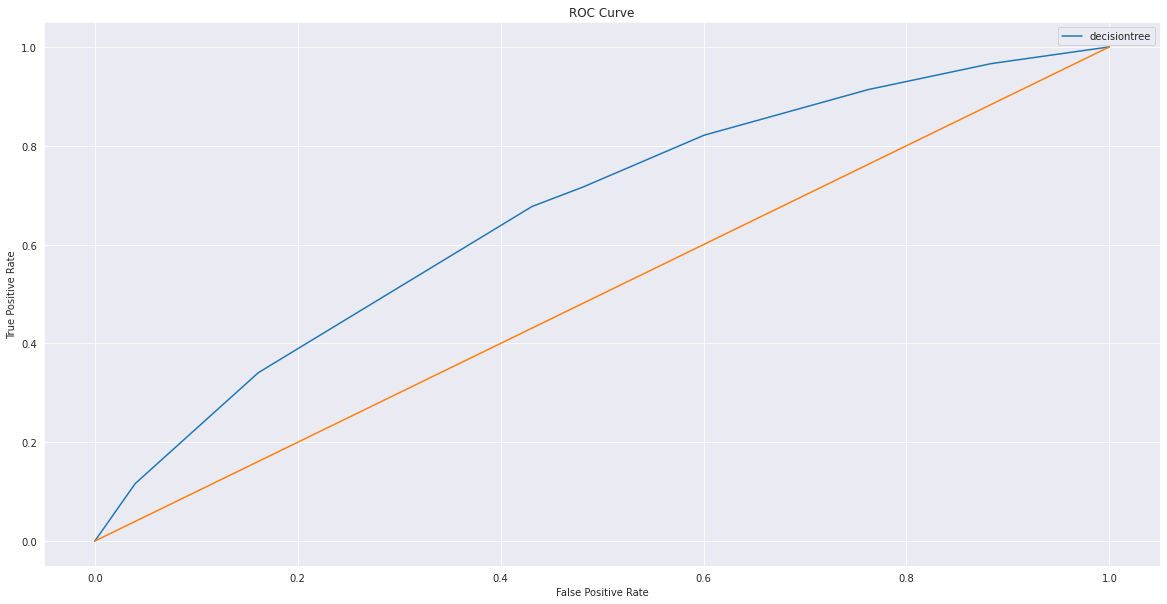

In [117]:
fpr, tpr, _ = roc_curve(dec[0], dec[1])

plt.figure(figsize=(20,10))
sns.lineplot(x=fpr, y=tpr, label="decisiontree")
ax = sns.lineplot(x=[0, 0.5, 1], y=[0, 0.5, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve')
plt.show()

Combining model results for combined ROC

In [118]:
models = {
    'Decision Tree': dec,
    'Random Forest': rand_f,
    'SVM': svc
}

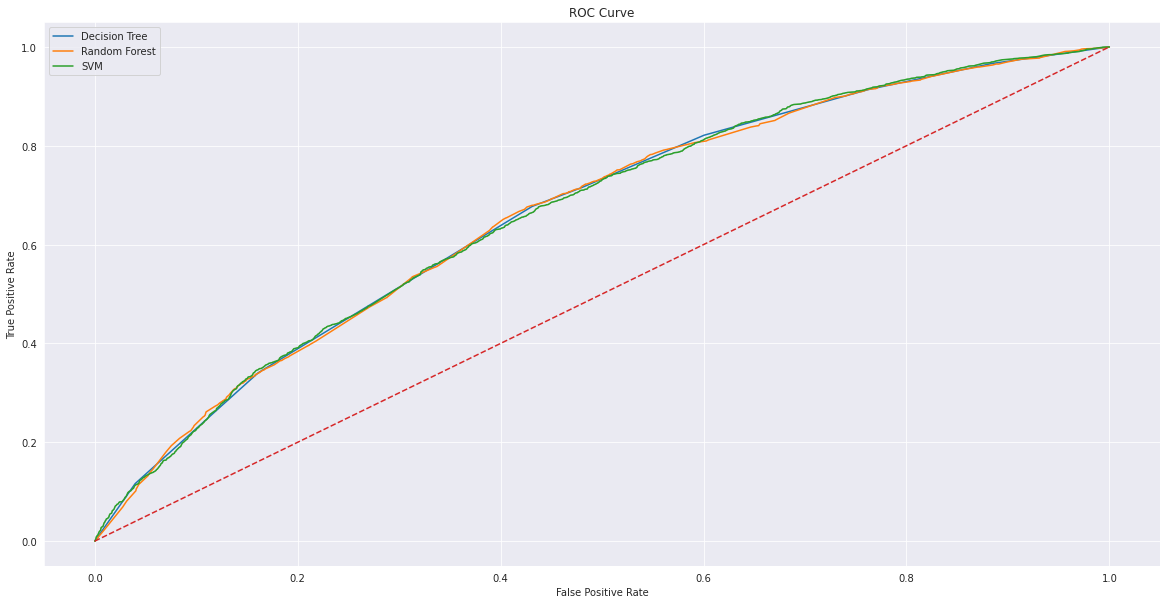

In [119]:
plt.figure(figsize=(20,10))
for key, value in models.items():
    fpr, tpr, _ = roc_curve(value[0], value[1])
    sns.lineplot(x=fpr, y=tpr, label=key)

ax = sns.lineplot(x=[0, 0.5, 1], y=[0, 0.5, 1])
ax.lines[len(models)].set_linestyle("--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve')
plt.show()

**Model Performance Summary**

SVM
Accuracy: 0.5946207118698663
Confusion Matrix: 
 [[2430  634]
 [1883 1262]]

RandomForest
 Accuracy: 0.622161378643904
Confusion Matrix: 
 [[1706 1358]
 [ 988 2157]]

DecisionTree
Accuracy: 0.6237719439523273
Confusion Matrix: 
 [[1743 1321]
 [1015 2130]]

 **All models are performing similar in terms of overall performance but False Negative of RandomForest algorithm is less compared to others. So RandomForest algorithm we can use and try to improve performance by different training techniques**

**Different Methods that can be used**

**Regression Analysis**

**Cleaning the dataset** Check the missing values and outlier, and fit a model full model and see which variables are significant.

**Define the categorical variables** and also the level of each categorical variables.

**Fitting the full model** with all features check the P value of each variables and which is varible is siginficant, R^2 adjust value.

**Variable Selection** There are couples of method which can be used inorder to check which vraibles(features) need to be kept in the model.

**Model selection** There are different method which can be tested out (according to my observation The best way to select the model is to see the pattern (residual plots and QQ-plot) of the how data is fit when all the features are included). and use the F test score to make a judgment.

**Check model Adequacy** In this we need to check the correaltion between the variables if there is any strong correation we can need to centre the data to solve the mutlicollinearity issue between them.

**Transformation method** is used if there is non-constant variance and non-normality problem occurs and check for its R^2, F test score. 

The second method that can be used is clustering analysis